<a href="https://colab.research.google.com/github/yodavo/moja-global-analysis/blob/main/2021-12-16_Task2-Holdrigde/lifezones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal -q
!apt install python3-rtree -q
!pip install geopandas -q
!pip install descartes -q

# Folium 
!pip install folium -q

# for rasters
!pip install Rasterio -q
!pip install rasterstats -q
!pip install georasters -q

# Install Pysal - Spatial Statistics
!pip install pysal -q
!pip install splot -q

In [98]:
import os, zipfile, glob
import rasterio,  gdal
import geopandas as gpd
import rasterstats
import numpy as np
from rasterio.plot import show
from rasterio.plot import show_hist
from matplotlib import pyplot as plt

In [125]:
# get the information in the zip file
# with zipfile.ZipFile('clip_tiffWorldclim[Colombia-Belize].zip', 'r') as temp:
#   temp.extractall("rasters")

# removing zip folder
# %rm "clip_tiffWorldclim[Colombia-Belize].zip"

# path to the folder
files = glob.glob(os.path.join('/content/rasters', '*tif'))

###### list of tiff files ######
# Rename and arrange the information
names = [i[i.rfind('/')+1:-4] for i in files]

# joining metadata
tiffs = list(zip(names, [rasterio.open(f, 'r') for f in files]))
tiffs.sort(key=lambda x:x[0])

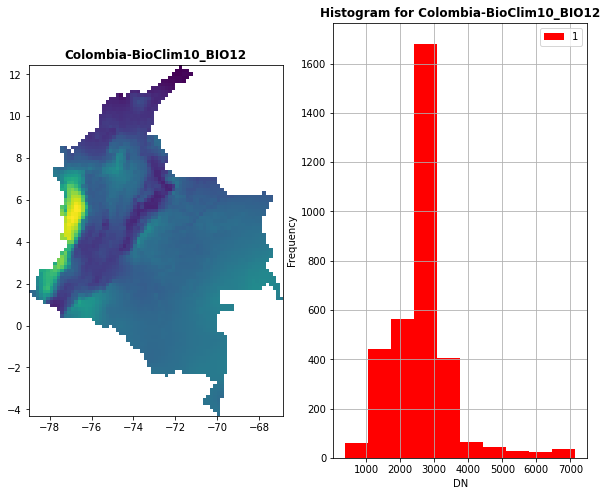

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8))
prueba = tiffs[8]
show(prueba[1], ax=ax1, title = prueba[0])
show_hist(prueba[1], title='Histogram for ' + prueba[0], ax=ax2)
plt.show()

In [45]:
prueba[1].meta

{'count': 1,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 100,
 'nodata': nan,
 'transform': Affine(0.16595355308285561, 0.0, -78.99093522817104,
       0.0, -0.16735490112371637, 12.437303168177309),
 'width': 73}

In [47]:
prueba[1].nodata

nan

In [49]:
prueba[1].transform

Affine(0.16595355308285561, 0.0, -78.99093522817104,
       0.0, -0.16735490112371637, 12.437303168177309)

In [55]:
# Assign raster values to nmpy nd arrray
prueba2 = prueba[1].read()
prueba2

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

# prueba con gdal

In [126]:
gtiffs = list(zip(names, [gdal.Open(f) for f in files]))
gtiffs.sort(key=lambda x:x[0])
gtiffs

[('Belize-BioClim10_BIO12',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b52832450> >),
 ('Belize-BioClim10_BIO2',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b527a3b10> >),
 ('Belize-BioClim2_5_BIO12',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b527a3a80> >),
 ('Belize-BioClim2_5_BIO2',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b52832840> >),
 ('Belize-BioClim30s_BIO12',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b6ad73390> >),
 ('Belize-BioClim30s_BIO2',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b52832750> >),
 ('Belize-BioClim5_BIO12',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b528324e0> >),
 ('Belize-BioClim5_BIO2',
  <osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f1b528328d0

In [121]:
files[1] == files[2]

False

In [127]:
prueba = gtiffs[4][1]
print(gtiffs[4][0], ' Temperature')
# print(gtiffs[0][0], ' Precipitation')

Belize-BioClim30s_BIO12  Temperature


# **Geotransform**
A geotransform is an affine transformation from the image coordinate space (row, column), also known as (pixel, line) to the georeferenced coordinate space (projected or geographic coordinates).\
**GT(0)** - x-coordinate of the upper-left corner of the upper-left pixel.\
**GT(1)** - w-e pixel resolution / pixel width.\
**GT(2)** - row rotation (typically zero).\
**GT(3)** - y-coordinate of the upper-left corner of the upper-left pixel.\
**GT(4)** - column rotation (typically zero).\
**GT(5)** - n-s pixel resolution / pixel height (negative value for a north-up image.\

In [84]:
# get transform ()
gt = prueba.GetGeoTransform()
gt

(-89.22912167026928,
 0.16032982235927104,
 0.0,
 18.4999822046599,
 0.0,
 -0.16331528981592058)

In [85]:
# get projection
proj = prueba.GetProjection()
proj

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

In [94]:
# get raster band
band = prueba.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f1b6a4de2a0> >

In [134]:
# create an array from arrays
array= band.ReadAsArray()
array

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [3346., 3333., 3333., ...,   nan,   nan,   nan],
       [3347., 3331., 3331., ...,   nan,   nan,   nan],
       [3327., 3320., 3320., ...,   nan,   nan,   nan]], dtype=float32)

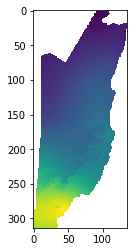

In [133]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# import 
#ds = gdal.Open()
ds = prueba
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

band = ds.GetRasterBand(1)
array = band.ReadAsArray()

plt.figure()
plt.imshow(array)
plt.show()

In [ ]:
# manipulate
binmask = np.where((array >= np.mean(array)),1,0)
plt.figure()
plt.imshow(binmask)
plt.show()

# export
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("binmask.tif", xsize = binmask.shape[1],
                      ysize = binmask.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(binmask)
outband.SetNoDataValue(np.nan)
outband.FlushCache()

# close your datasets and bands!!!
outband = None
outds = None